In [1]:
%load_ext autoreload

%autoreload 2

# New data

- preprocess the new data
- train it on just DNN
- then on CNN
- setup tensorboard for experiment tracking

# Preprocessing

In [3]:
import sklearn
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
data = {}
for folder in glob.glob("../data/*"):
    f_name = folder.split("\\")[1]
    if f_name not in data:
        n_files = glob.glob(f"{folder}\*.jpg")
        data[f_name] = len(n_files)
        print(f_name, len(n_files))


+ 25112
- 33997
div 868
rightarrow 1703
times 3251
u 1269
v 1558
w 556
y 9340
z 5870


In [5]:
sorted(data.items(), key = lambda x:x[1], reverse=True)

[('-', 33997),
 ('+', 25112),
 ('y', 9340),
 ('z', 5870),
 ('times', 3251),
 ('rightarrow', 1703),
 ('v', 1558),
 ('u', 1269),
 ('div', 868),
 ('w', 556)]

In [6]:
df = pd.DataFrame()
df["Distribution"] = list(data.values())
df["Classes"] = list(data.keys())

In [7]:
df.head()

,Distribution,Classes
0,25112,+
1,33997,-
2,868,div
3,1703,rightarrow
4,3251,times


In [8]:
df = df.sort_values("Distribution", ascending=False)

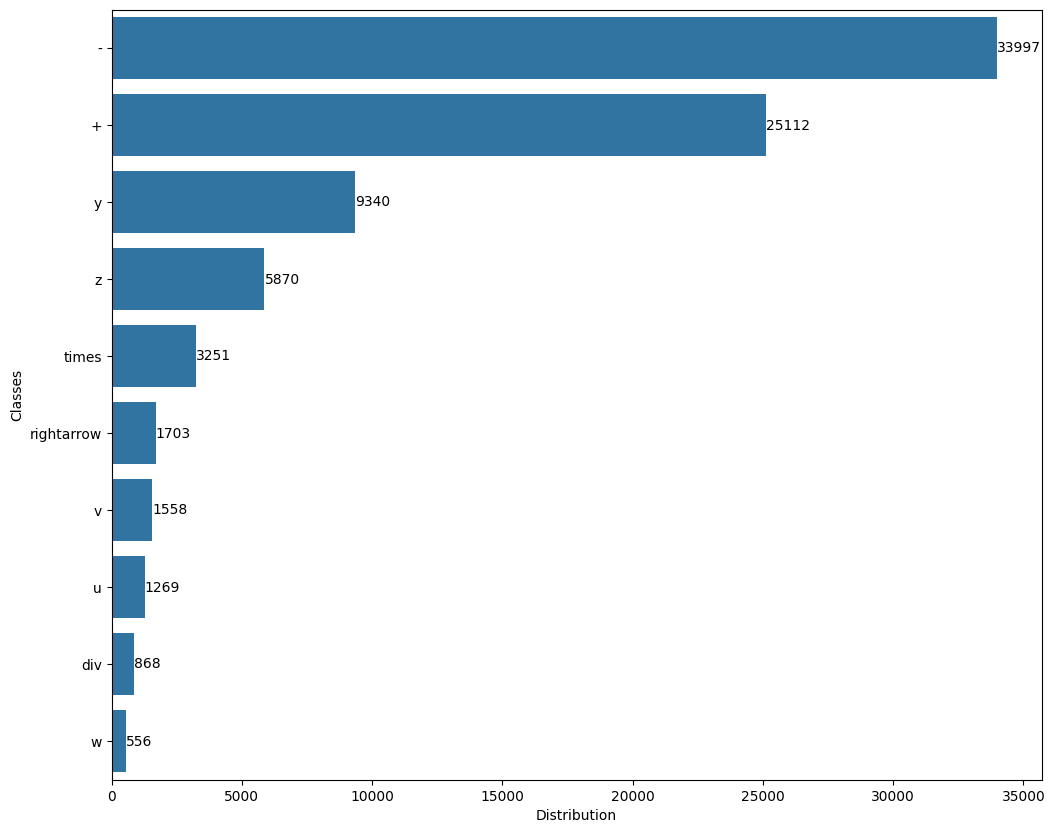

In [11]:
plt.figure(figsize=(12,10))
ax = sns.barplot(y="Classes", x="Distribution", data=df)
ax.bar_label(ax.containers[0])
plt.show()

In [12]:
labels = sorted(list(df["Classes"]))
labels_map = {label:10+index for index, label in enumerate(labels)}

In [13]:
labels_map

{'+': 10,
 '-': 11,
 'div': 12,
 'rightarrow': 13,
 'times': 14,
 'u': 15,
 'v': 16,
 'w': 17,
 'y': 18,
 'z': 19}

In [14]:
import cv2
import mnist

In [250]:
x_mnist_train, y_mnist_train, x_mnist_test, y_mnist_test = mnist.load()

x_mnist_train, x_mnist_test = x_mnist_train.reshape((x_mnist_train.shape[0],28, 28)), x_mnist_test.reshape((x_mnist_test.shape[0], 28, 28))

In [286]:

kernel = np.array([[0, -1, 0], [-1, 6, -1], [0, -1, 0]])
reshaped_x_train_mnist, reshaped_x_test_mnist = [], []


for img in x_mnist_train:
    img = cv2.resize(img, (55,55), cv2.INTER_CUBIC, fx=0.1, fy=0.1)
    img = cv2.filter2D(img, -1, kernel)
    reshaped_x_train_mnist.append(img)

for img in x_mnist_test:
    img = cv2.resize(img, (55,55), cv2.INTER_CUBIC, fx=0.1, fy=0.1)
    img = cv2.filter2D(img, -1, kernel)
    reshaped_x_test_mnist.append(img)

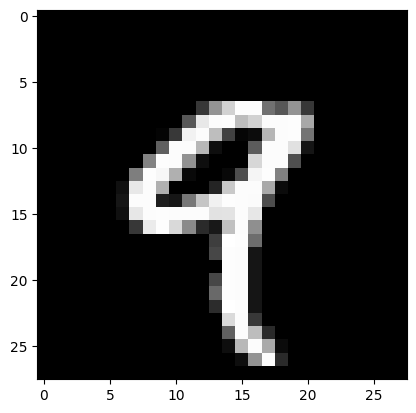

In [287]:
plt.imshow(reshaped_x_train_mnist[4], cmap="gray")

In [18]:
list(df["Classes"])

['-', '+', 'y', 'z', 'times', 'rightarrow', 'v', 'u', 'div', 'w']

In [332]:
import glob
import os
from pathlib import Path
import glob

# Specify the path to your dataset
images = []
labels = []
goodlabels = ["0","1","2","3","4","5","6","7","8","9","+","-","rightarrow","div","times","u","v","z","w","y"]
path = '../data/'

for label in os.listdir(path):
    if(label in goodlabels): 
        label_path = os.path.join(path,label)
        print(label_path)
        counter = 0
        for filename in os.listdir(label_path):
            if(counter > 7000):
                break
            counter = counter + 1
            img_path = os.path.join(label_path,filename)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img = cv2.GaussianBlur(img, (5,5), 0)
            img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
            img = cv2.copyMakeBorder(img, 5, 5, 5, 5, cv2.BORDER_CONSTANT, value=0)
            img = cv2.dilate(img, np.ones((2,2), np.uint8), iterations=1)
            images.append(img)
            labels.append(labels_map[label])
# print(finalLabel)
# print(finalImage[0])


../data/+
../data/-
../data/0
../data/1
../data/2
../data/3
../data/4
../data/5
../data/6
../data/7
../data/8
../data/9
../data/div
../data/rightarrow
../data/times
../data/u
../data/v
../data/w
../data/y
../data/z


In [333]:
images = np.asarray(images)
labels = np.asarray(labels)

In [339]:
np.unique(labels, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 array([6914, 7001, 7001, 7001, 7001, 3545, 3118, 2909, 3068, 3737, 7001,
        7001,  868, 1703, 3251, 1269, 1558,  556, 7001, 5870], dtype=int64))

In [335]:
src = "../data/+/+_20.jpg"

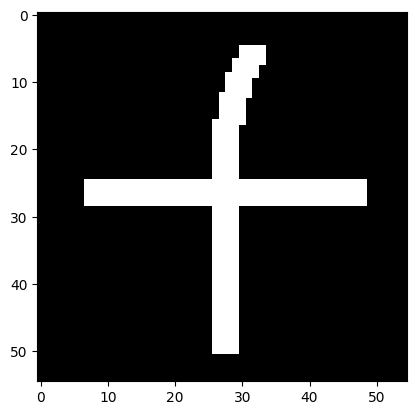

In [338]:
# img = cv2.imread(src)
# img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# img = cv2.GaussianBlur(img, (5,5), 0)
# img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
# img = cv2.dilate(img, np.ones((2,2), np.uint8), iterations=1)
# img = cv2.resize(img, (45, 45))
# cv2.
# img = cv2.dilate(img, )
plt.imshow(images[1], cmap="gray")


In [340]:
# images = np.append(reshaped_x_train_mnist, images, axis=0)
# images = np.append(images, reshaped_x_test_mnist, axis=0)

In [341]:
np.unique(labels, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 array([6914, 7001, 7001, 7001, 7001, 3545, 3118, 2909, 3068, 3737, 7001,
        7001,  868, 1703, 3251, 1269, 1558,  556, 7001, 5870], dtype=int64))

In [342]:
# labels = np.append(y_mnist_train, labels, axis=0)
# labels = np.append(labels, y_mnist_test, axis=0)

In [297]:
numbers_map = {label:idx for idx, label in enumerate(list("0123456789"))}
numbers_map.update(labels_map)

In [298]:
numbers_map

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9,
 '+': 10,
 '-': 11,
 'div': 12,
 'rightarrow': 13,
 'times': 14,
 'u': 15,
 'v': 16,
 'w': 17,
 'y': 18,
 'z': 19}

Text(0.5, 0, '8')

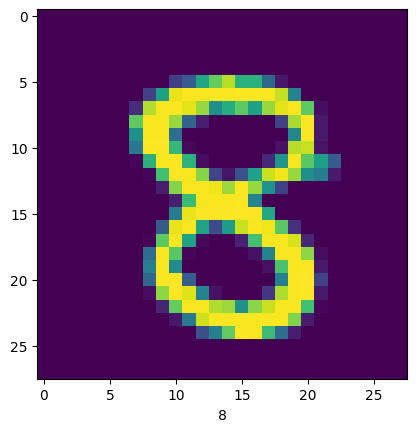

In [299]:
r = np.random.randint(labels.shape[0])
plt.imshow(images[r])
plt.xlabel(labels[r])

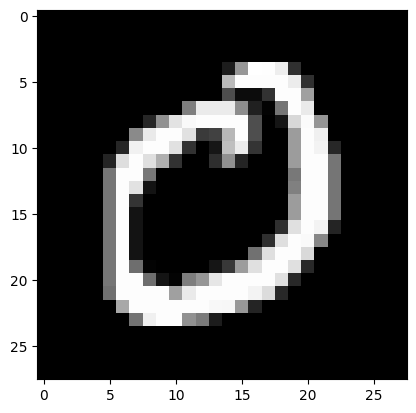

In [301]:
r = np.random.randint(len(images))
plt.imshow(images[r].reshape(28,28), cmap="gray")

In [302]:
np.unique(labels, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 array([6903, 7877, 6990, 7141, 6824, 6313, 6876, 7293, 6825, 6958, 7001,
        7001,  868, 1703, 3251, 1269, 1558,  556, 7001, 5870], dtype=int64))

In [303]:
from PIL import Image
from sklearn.model_selection import train_test_split

In [343]:
# Now here we will split the data into train test and validate
# basically we allocate 30% of data to test and validate
# now we will allocate 15% of total data to test and 15% of total data to validate
temp_X, X_test, temp_Y, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(temp_X, temp_Y, test_size=0.1, random_state=42)

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)
X_val, y_val = np.array(X_val), np.array(y_val)

# Now preprocessed_data contains your preprocessed images as NumPy arrays, and labels contain corresponding class labels
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(62908, 55, 55)
(17475, 55, 55)
(6990, 55, 55)


In [344]:
labels_map = numbers_map
print(labels_map)

{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, '+': 10, '-': 11, 'div': 12, 'rightarrow': 13, 'times': 14, 'u': 15, 'v': 16, 'w': 17, 'y': 18, 'z': 19}


In [345]:
np.unique(y_train, return_counts = True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 array([4975, 5103, 4964, 5031, 5051, 2545, 2197, 2109, 2190, 2679, 5068,
        5044,  611, 1227, 2281,  925, 1146,  405, 5113, 4244], dtype=int64))

In [346]:
np.unique(y_test, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 array([1368, 1385, 1452, 1439, 1391,  702,  646,  576,  637,  764, 1378,
        1385,  179,  352,  702,  256,  295,  104, 1329, 1135], dtype=int64))

In [347]:
np.unique(y_val, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 array([571, 513, 585, 531, 559, 298, 275, 224, 241, 294, 555, 572,  78,
        124, 268,  88, 117,  47, 559, 491], dtype=int64))

In [348]:
def idtolabel(labels_map, y):
    for key, value in labels_map.items():
        if y == value:
            return key
        
    return -1


In [350]:
labels_map

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9,
 '+': 10,
 '-': 11,
 'div': 12,
 'rightarrow': 13,
 'times': 14,
 'u': 15,
 'v': 16,
 'w': 17,
 'y': 18,
 'z': 19}

11


Text(0.5, 0, '-')

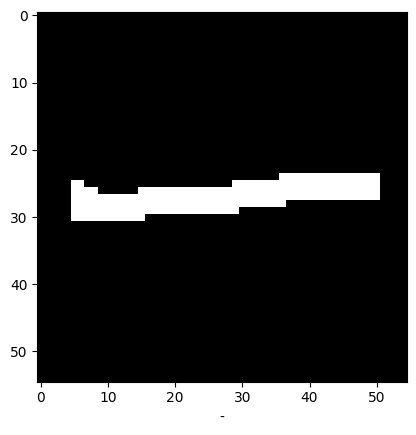

In [359]:
x_data, y_data = X_train, y_train
r = np.random.randint(0,len(x_data))
plt.imshow(x_data[r], cmap="gray")
print(y_data[r])
plt.xlabel(idtolabel(labels_map, y_data[r]))

# Model

In [311]:
import utils

In [360]:
X_train_preprocessed = X_train
y_train_preprocessed = y_train

X_train_preprocessed = np.expand_dims(X_train_preprocessed, axis=1)
X_train_preprocessed = utils.minmax_normalize(X_train_preprocessed)

X_val_preprocessed = X_val
y_val_preprocessed = y_val

X_val_preprocessed = np.expand_dims(X_val_preprocessed, axis=1)
X_val_preprocessed = utils.minmax_normalize(X_val_preprocessed)

X_test_preprocessed = X_test
y_test_preprocessed = y_test

X_test_preprocessed = np.expand_dims(X_test_preprocessed, axis=1)
X_test_preprocessed = utils.minmax_normalize(X_test_preprocessed)

(1, 55, 55)


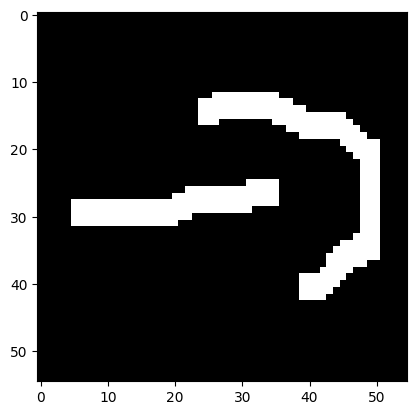

In [362]:
print(X_train_preprocessed[100].shape)

plt.imshow(X_train_preprocessed[100][0], cmap="gray")

In [363]:
X_train_preprocessed.shape

(62908, 1, 55, 55)

In [364]:
x_data.shape

(62908, 55, 55)

Text(0.5, 0, '+')

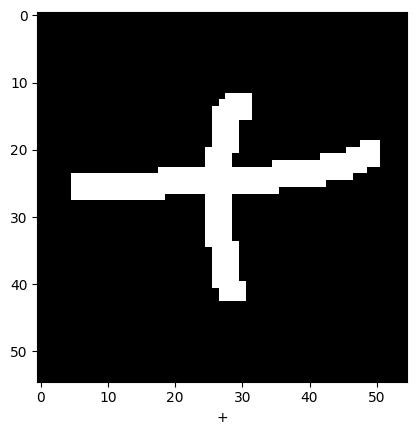

In [365]:
x_data, y_data = X_train_preprocessed, y_train_preprocessed
r = np.random.randint(0,len(x_data))
plt.imshow(x_data[r][0], cmap="gray")
plt.xlabel(idtolabel(labels_map, y_data[r]))

In [246]:
# from model import Sequential
# np.random.seed(42)


# conv_1 = ConvLayer("conv_1", n_filters = 10, filter_size = 3, stride = 1, debug=False)
# relu_1 = ReluLayer("relu_1")
# conv_2 = ConvLayer("conv_2", n_filters = 10, filter_size = 3, stride = 2, debug=False)
# relu_2 = ReluLayer("relu_2")
# flatten_1 = Flatten("flatten_1")
# dense_1 = DenseLayer("Dense_1", 4410, 84, debug=False)
# relu_3 = ReluLayer("relu_3")
# dense_2 = DenseLayer("Dense_2", 84, len(labels_map), debug=False)


# layers =  [conv_1, relu_1, conv_2, relu_2, flatten_1, dense_1, relu_3, dense_2]

# sequential_model = Sequential(layers)

In [875]:
# model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(45, 45, 1)))
# model.add(tf.keras.layers.MaxPool2D(strides=2))

# # Second Convolutional Block
# model.add(tf.keras.layers.Conv2D(filters=48, kernel_size=(5,5), padding='valid', activation='relu'))
# model.add(tf.keras.layers.MaxPool2D(strides=2))

# # Classifier Head
# model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dense(256, activation='relu'))
# model.add(tf.keras.layers.Dense(84, activation='relu'))
# model.add(tf.keras.layers.Dense(7, activation='softmax'))

In [411]:
from model import Sequential
from layers.conv import ConvLayer
from layers.dense import DenseLayer
from layers.flatten import Flatten
from layers.maxpool import MaxPool
from layers.relu import ReluLayer

np.random.seed(42)


conv_1 = ConvLayer("conv_1", n_filters = 8, filter_size = 3, stride = 1, debug=False)
relu_1 = ReluLayer("relu_1")
max_1 = MaxPool("max_pool_1", 2, 2)

# conv_2 = ConvLayer("conv_2", n_filters = 12, filter_size = 5, stride = 1, debug=False)
relu_2 = ReluLayer("relu_2")
# max_2 = MaxPool("max_pool_2", 2, 2)

flatten_1 = Flatten("flatten_1")

dense_1 = DenseLayer("Dense_1", 22472, 256, debug=False)
relu_3 = ReluLayer("relu_3")

dense_2 = DenseLayer("Dense_2", 256, len(labels_map), debug=False)
# relu_4 = ReluLayer("relu_4")

# dense_3 = DenseLayer("Dense_3", 42, len(labels_map), debug=False)

layers = [conv_1, relu_1, flatten_1, dense_1, relu_2, dense_2]

sequential_model = Sequential(layers)


In [378]:
X_train.shape, X_val.shape

((62908, 55, 55), (6990, 55, 55))

In [379]:
X_val_preprocessed.shape

(6990, 1, 55, 55)

In [380]:
np.unique(y_train_preprocessed, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 array([4975, 5103, 4964, 5031, 5051, 2545, 2197, 2109, 2190, 2679, 5068,
        5044,  611, 1227, 2281,  925, 1146,  405, 5113, 4244], dtype=int64))

In [381]:
y_val_preprocessed.shape, X_val_preprocessed.shape

((6990,), (6990, 1, 55, 55))

In [382]:
sequential_model._validate([X_val_preprocessed, y_val_preprocessed]) # without training

(4.86409155937053, 3.1317426346014683)

In [443]:
labels_map

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9,
 '+': 10,
 '-': 11,
 'div': 12,
 'rightarrow': 13,
 'times': 14,
 'u': 15,
 'v': 16,
 'w': 17,
 'y': 18,
 'z': 19}

In [383]:
np.unique(y_train_preprocessed, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 array([4975, 5103, 4964, 5031, 5051, 2545, 2197, 2109, 2190, 2679, 5068,
        5044,  611, 1227, 2281,  925, 1146,  405, 5113, 4244], dtype=int64))

In [412]:
sequential_model.train([X_train_preprocessed, y_train_preprocessed], [X_val_preprocessed, y_val_preprocessed], 5, 32, True, 1e-02)

----------
Epoch 1
Epoch Progress 99.96 %, batch 1965, batch loss 0.784210507289143, batch accuracy 82.14285714285714
Time 1296.408117055893 seconds
Train Accuracy 65.72931900553188, Validation accuracy 80.30042918454936
Train Loss 1.244683319612397, Validation loss 0.7063991426068278
----------
----------
Epoch 2
Epoch Progress 99.96 %, batch 1965, batch loss 0.7531138213683708, batch accuracy 78.57142857142857
Time 1285.378398656845 seconds
Train Accuracy 79.92465187257582, Validation accuracy 81.9170243204578
Train Loss 0.7514744145860247, Validation loss 0.6250714853324095
----------
----------
Epoch 3
Epoch Progress 99.96 %, batch 1965, batch loss 0.5970396845207936, batch accuracy 89.28571428571429
Time 1203.244000196457 seconds
Train Accuracy 83.65231767024862, Validation accuracy 87.79685264663806
Train Loss 0.6238866632300416, Validation loss 0.4993232058859793
----------
----------
Epoch 4
Epoch Progress 99.96 %, batch 1965, batch loss 0.25237572142177517, batch accuracy 96.4

In [413]:
sequential_model.test([X_test_preprocessed, y_test_preprocessed])

(89.17310443490702, 0.3802830216158072)

In [414]:
labels_map

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9,
 '+': 10,
 '-': 11,
 'div': 12,
 'rightarrow': 13,
 'times': 14,
 'u': 15,
 'v': 16,
 'w': 17,
 'y': 18,
 'z': 19}

2

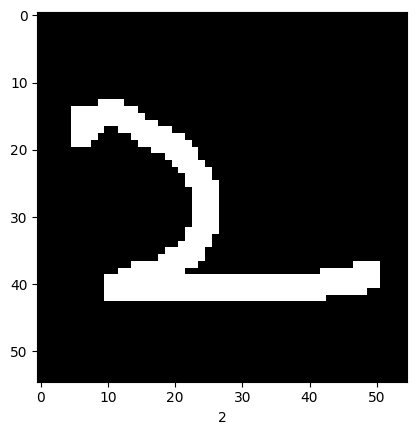

In [424]:
idx = np.random.randint(0, X_test_preprocessed.shape[0])
test_image = utils.minmax_normalize(X_test_preprocessed[idx])

plt.imshow(test_image.reshape(55, 55), cmap="gray")
plt.xlabel(y_test_preprocessed[idx])

np.argmax(sequential_model._forward(np.expand_dims(test_image, 0)))

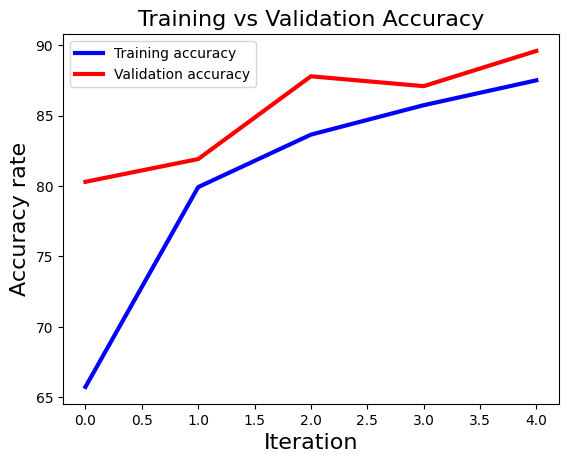

In [425]:
utils.plot_accuracy_curve(sequential_model.train_accuracy, sequential_model.validation_accuracy)

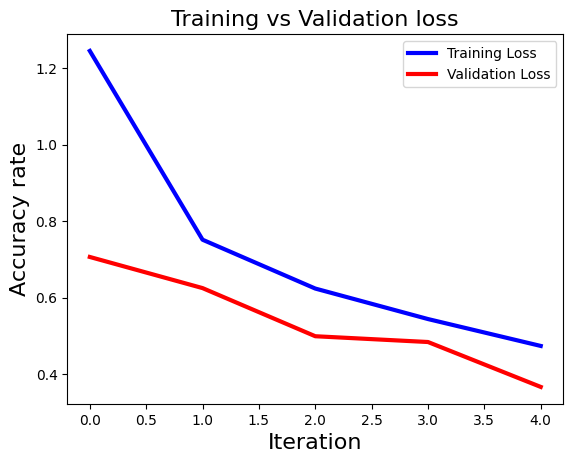

In [426]:
utils.plot_loss_curve(sequential_model.train_loss, sequential_model.validation_loss)

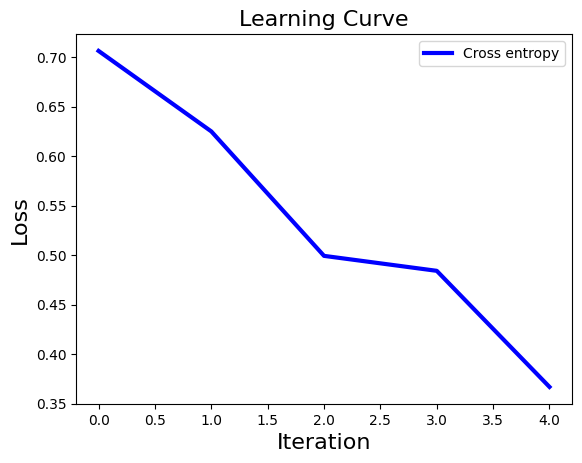

In [427]:
utils.plot_learning_curve(sequential_model.validation_loss)


# Saving the model

In [428]:
import time
import utils
time.strftime("%Y%m%d%H%M%S")

'20231128085955'

In [430]:
utils.save_model(sequential_model, "exp1_train_4")

# Loading the saved model

In [117]:
loaded_sequential = utils.load_model("./models/exp1_10k_train_2_20231127191523.pkl")

In [123]:
labels_map

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9,
 '+': 10,
 '-': 11,
 'div': 12,
 'rightarrow': 13,
 'times': 14,
 'u': 15,
 'v': 16,
 'w': 17,
 'y': 18,
 'z': 19}

18

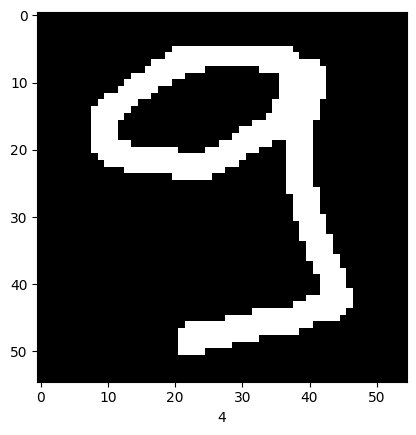

In [433]:
idx = np.random.randint(0, X_test_preprocessed.shape[0])
test_image = utils.minmax_normalize(X_train_preprocessed[1])

plt.imshow(test_image.reshape(55, 55), cmap="gray")
plt.xlabel(y_test_preprocessed[idx])

np.argmax(loaded_sequential._forward(np.expand_dims(test_image, 0)))

# Metrics

### Confusion metrics

In [434]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report

In [435]:
y_test_predictions = sequential_model._forward(X_test_preprocessed)

In [436]:
y_test_predictions.shape

(17475, 20)

In [437]:
y_test_predictions =  np.argmax(y_test_predictions, axis=1)

In [438]:
labels_map

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9,
 '+': 10,
 '-': 11,
 'div': 12,
 'rightarrow': 13,
 'times': 14,
 'u': 15,
 'v': 16,
 'w': 17,
 'y': 18,
 'z': 19}

In [439]:
target_names = list(labels_map.keys())

In [440]:
target_names

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '+',
 '-',
 'div',
 'rightarrow',
 'times',
 'u',
 'v',
 'w',
 'y',
 'z']

Confusion Matrix:


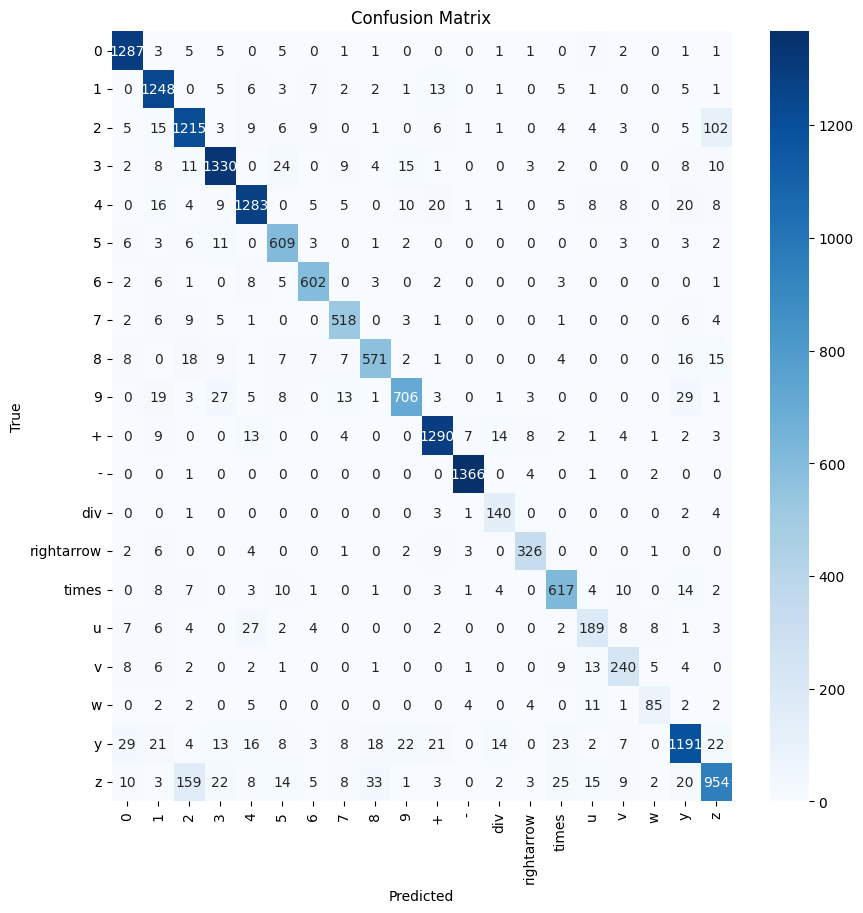

Accuracy: 0.90
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.96      1368
           1       0.96      0.90      0.93      1385
           2       0.87      0.84      0.86      1452
           3       0.93      0.92      0.93      1439
           4       0.91      0.92      0.92      1391
           5       0.94      0.87      0.90       702
           6       0.95      0.93      0.94       646
           7       0.93      0.90      0.92       576
           8       0.86      0.90      0.88       637
           9       0.86      0.92      0.89       764
           +       0.95      0.94      0.94      1378
           -       0.99      0.99      0.99      1385
         div       0.93      0.78      0.85       179
  rightarrow       0.92      0.93      0.92       352
       times       0.90      0.88      0.89       702
           u       0.72      0.74      0.73       256
           v       0.82      0.81      0.82

In [441]:
# Generate confusion matrix
cm = confusion_matrix(y_test_predictions, y_test_preprocessed)

# Print confusion matrix
print("Confusion Matrix:")

# Plot confusion matrix using seaborn
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Calculate accuracy and other metrics
accuracy = accuracy_score(y_test_predictions, y_test_preprocessed)
report = classification_report(y_test_preprocessed, y_test_predictions, target_names=target_names)

# Print accuracy and classification report
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)


In [209]:
def preprocess_image(img):
    kernel = np.array([[0, -1, 0], [-1, 6, -1], [0, -1, 0]])
    img = cv2.imread(img)
    img = cv2.resize(img, (55, 55), cv2.INTER_CUBIC, fx=0.1, fy=0.1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.GaussianBlur(img, (5, 5), 0)
    img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
    img = cv2.dilate(img, np.ones((2, 2), np.uint8), iterations=1)
    img = cv2.filter2D(img, -1, kernel)
    return img

In [210]:
img = preprocess_image("./equations/five.png")

In [211]:
img.shape

(55, 55)

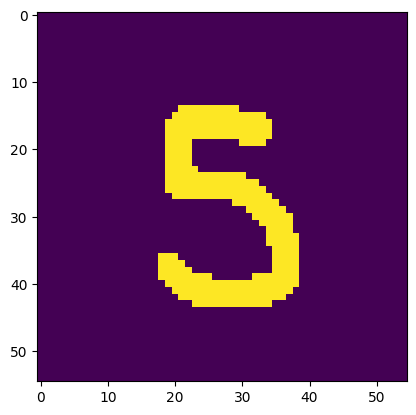

In [212]:
plt.imshow(img)

In [160]:
img.shape

(1, 1, 55, 55)

In [165]:
test_image.shape

(1, 1, 55, 55)

5

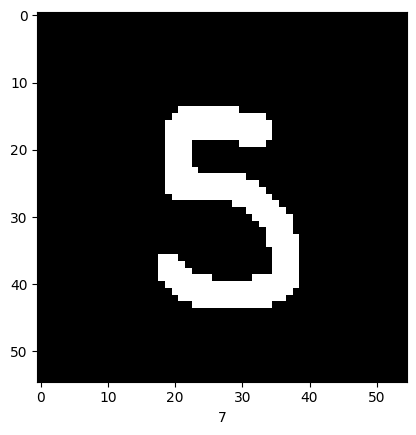

In [194]:
test_image = np.expand_dims(img, (0,1))
test_image = utils.minmax_normalize(test_image)

plt.imshow(test_image.reshape(55, 55), cmap="gray")
plt.xlabel(y_test_preprocessed[idx])

np.argmax(loaded_sequential._forward(test_image))

In [168]:
def sort_contours(cnts, method="left-to-right"):
	# initialize the reverse flag and sort index
	reverse = False
	i = 0
	# handle if we need to sort in reverse
	if method == "right-to-left" or method == "bottom-to-top":
		reverse = True
	# handle if we are sorting against the y-coordinate rather than
	# the x-coordinate of the bounding box
	if method == "top-to-bottom" or method == "bottom-to-top":
		i = 1
	# construct the list of bounding boxes and sort them from top to
	# bottom
	boundingBoxes = [cv2.boundingRect(c) for c in cnts]
	(cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
		key=lambda b:b[1][i], reverse=reverse))
	# return the list of sorted contours and bounding boxes
	return (cnts, boundingBoxes)

In [169]:
def boundingBoxes(fileName):
    # Read Input image
    inputImage = cv2.imread(fileName)
    # Deep copy for results
    inputImageCopy = inputImage.copy()
    # Convert BGR to grayscale
    grayscaleImage = cv2.cvtColor(inputImage, cv2.COLOR_BGR2GRAY)
    # Threshold via Otsu
    threshValue, binaryImage = cv2.threshold(grayscaleImage, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    # Get each bounding box
    # Find the big contours/blobs on the filtered image
    contours, hierarchy = cv2.findContours(binaryImage, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours,_ = sort_contours(contours)
    # contours, _ = sort_contours(contours, "top-to-bottom")


    # Expand the bounding box size
    expansion_value = 10  # Increase this value to expand the bounding boxes more
    bounding_boxes = []
    # Look for the outer bounding boxes (no children)
    for _, c in enumerate(contours):
        # Get the bounding rectangle of the current contour
        boundRect = cv2.boundingRect(c)
        
        # Expand bounding box
        rectX = max(0, boundRect[0] - expansion_value)
        rectY = max(0, boundRect[1] - expansion_value)
        rectWidth = min(inputImage.shape[1] - rectX, boundRect[2] + 2 * expansion_value)
        rectHeight = min(inputImage.shape[0] - rectY, boundRect[3] + 2 * expansion_value)
        
        # Draw expanded bounding box
        color = (0, 255, 0)
        start_X = int(rectX)
        end_X = int(start_X + rectWidth)
        start_Y = int(rectY)
        end_Y = int(start_Y + rectHeight)
        contoursImage = inputImageCopy.copy()
        bounding_boxes.append(contoursImage[start_Y:end_Y, start_X:end_X])
        cv2.rectangle(inputImageCopy, (start_X, start_Y),
                    (end_X, end_Y), color, 2)

    # Show the image with expanded bounding boxes
    bb_image = cv2.cvtColor(inputImageCopy, cv2.COLOR_BGR2RGB)
    plt.imshow(bb_image)
    return bounding_boxes

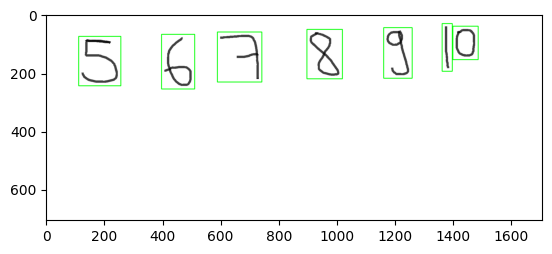

In [171]:
folder = "./equations/"
fileName = f"{folder}/nums.png"
bounding_boxes = boundingBoxes(fileName)

In [228]:
def preprocess_image(img):
    kernel = np.array([[0, -1, 0], [-1, 6, -1], [0, -1, 0]])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.GaussianBlur(img, (5, 5), 0)
    img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
    img = cv2.dilate(img, np.ones((2, 2), np.uint8), iterations=1)
    img = cv2.dilate(img, np.ones((2, 2), np.uint8), iterations=1)
    img = cv2.filter2D(img, -1, kernel)
    return img

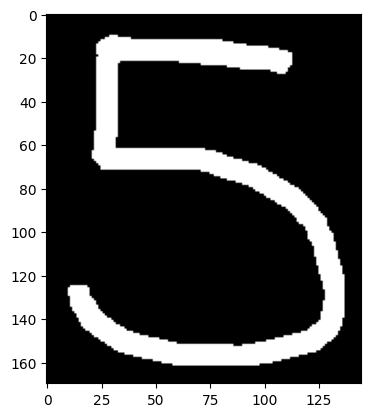

In [229]:
plt.imshow(preprocess_image(bounding_boxes[0]), cmap="gray")

In [230]:
def predict(model:Sequential, img):
    img = np.expand_dims(img, (0,1))
    img = utils.minmax_normalize(img)
    print(img.shape, img.max())
    logits = model._forward(img)
    y_pred = np.argmax(logits, axis=1)
    return y_pred
    

In [231]:

def get_symbols(model, bounding_boxes):
    equation_string = []
    for bb in bounding_boxes:
        preprocessed_img = preprocess_image(bb)
        max_index = predict(model, preprocessed_img)
        labels = labels = {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, '+': 10, '-': 11, 'div': 12, 'rightarrow': 13, 'times': 14, 'u': 15, 'v': 16, 'w': 17, 'y': 18, 'z': 19}
        predicted_class = idtolabel(labels, max_index)
        print(max_index)
        equation_string.append(predicted_class)

    return equation_string



In [232]:
plt.imshow(preprocess_image(test_image))

error: OpenCV(4.8.1) d:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<3,4,-1>,struct cv::impl::A0xd8611878::Set<1,-1,-1>,struct cv::impl::A0xd8611878::Set<0,2,5>,3>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


In [ ]:
symbols_list = get_symbols(loaded_sequential, bounding_boxes)
print(symbols_list)

(1, 1, 55, 55) 1.0
[18]
(1, 1, 55, 55) 1.0
[19]
(1, 1, 55, 55) 1.0
[10]
(1, 1, 55, 55) 1.0
[19]
(1, 1, 55, 55) 1.0
[18]
(1, 1, 55, 55) 1.0
[18]
(1, 1, 55, 55) 1.0
[19]
['y', 'z', '+', 'z', 'y', 'y', 'z']
